In [1]:
import time
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

### B0005 배터리 Fresh & Aged CCCV 충전성능 비교

In [2]:
b0005_df = pd.read_csv("./DataFrame/B0005_charge_df.csv")
b0005_df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,2,24,2008-04-02 16:37:51,3.434644,1.508670,29.334717,1.498,4.142,5.500
1,2,24,2008-04-02 16:37:51,3.454857,1.510043,29.341949,1.498,4.180,8.391
2,2,24,2008-04-02 16:37:51,3.468788,1.508704,29.331462,1.498,4.196,11.266
3,2,24,2008-04-02 16:37:51,3.480954,1.511625,29.322898,1.500,4.207,14.141
4,2,24,2008-04-02 16:37:51,3.491931,1.509182,29.302353,1.498,4.223,17.031
...,...,...,...,...,...,...,...,...,...
376876,169,24,2008-05-27 17:53:59,4.205308,0.070945,23.957315,0.069,4.256,7188.000
376877,169,24,2008-05-27 17:53:59,4.205265,0.066751,23.955934,0.069,4.256,7190.906
376878,169,24,2008-05-27 17:53:59,4.205346,0.070952,23.951416,0.069,4.256,7193.812
376879,169,24,2008-05-27 17:53:59,4.205299,0.067115,23.951201,0.069,4.256,7196.718


In [3]:
b0005_df_cycle1 = b0005_df.loc[b0005_df.loc[:,"cycle"] == 2]
b0005_df_cycle167 = b0005_df.loc[b0005_df.loc[:,"cycle"] == 167]

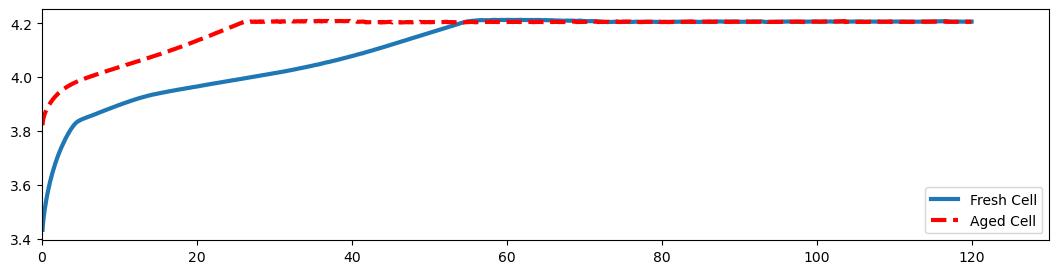

In [4]:
plt.rcParams['figure.figsize'] = [13, 3]
plt.xlim([0, 130])
plt.plot(b0005_df_cycle1.loc[:,"time"]/60, b0005_df_cycle1.loc[:,"voltage_measured"], label="Fresh Cell", linewidth=3)
plt.plot(b0005_df_cycle167.loc[:,"time"]/60, b0005_df_cycle167.loc[:,"voltage_measured"], label="Aged Cell", color='red', linestyle='--', linewidth=3)
plt.legend()
plt.show()

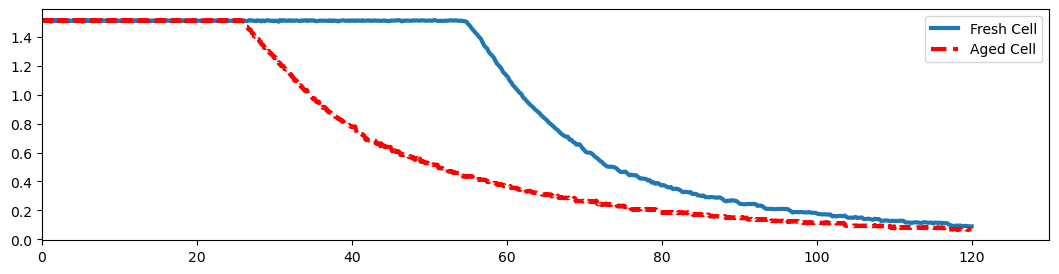

In [5]:
plt.xlim([0, 130])
plt.plot(b0005_df_cycle1.loc[:,"time"]/60, b0005_df_cycle1.loc[:,"current_measured"], label="Fresh Cell", linewidth=3)
plt.plot(b0005_df_cycle167.loc[:,"time"]/60, b0005_df_cycle167.loc[:,"current_measured"],label="Aged Cell", color='red', linestyle='--', linewidth=3)
plt.legend()
plt.show()

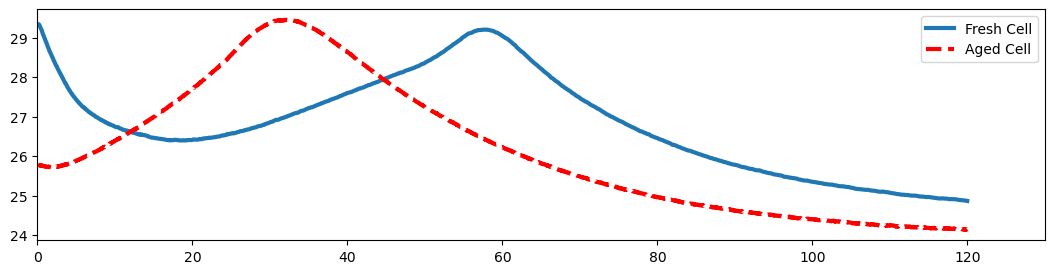

In [6]:
plt.xlim([0, 130])
plt.plot(b0005_df_cycle1.loc[:,"time"]/60, b0005_df_cycle1.loc[:,"temperature_measured"], label="Fresh Cell",linewidth=3)
plt.plot(b0005_df_cycle167.loc[:,"time"]/60, b0005_df_cycle167.loc[:,"temperature_measured"], label="Aged Cell", color='red', linestyle='--', linewidth=3)
plt.legend()
plt.show()

### 배터리 종류별 사이클 마다 capacity 변화도

In [7]:
b0005_capacity = pd.read_csv("./DataFrame/B0005_capacity_df.csv").loc[:,["capacity"]]
b0006_capacity = pd.read_csv("./DataFrame/B0006_capacity_df.csv").loc[:,["capacity"]]
b0007_capacity = pd.read_csv("./DataFrame/B0007_capacity_df.csv").loc[:,["capacity"]]
b0018_capacity = pd.read_csv("./DataFrame/B0018_capacity_df.csv").loc[:,["capacity"]]

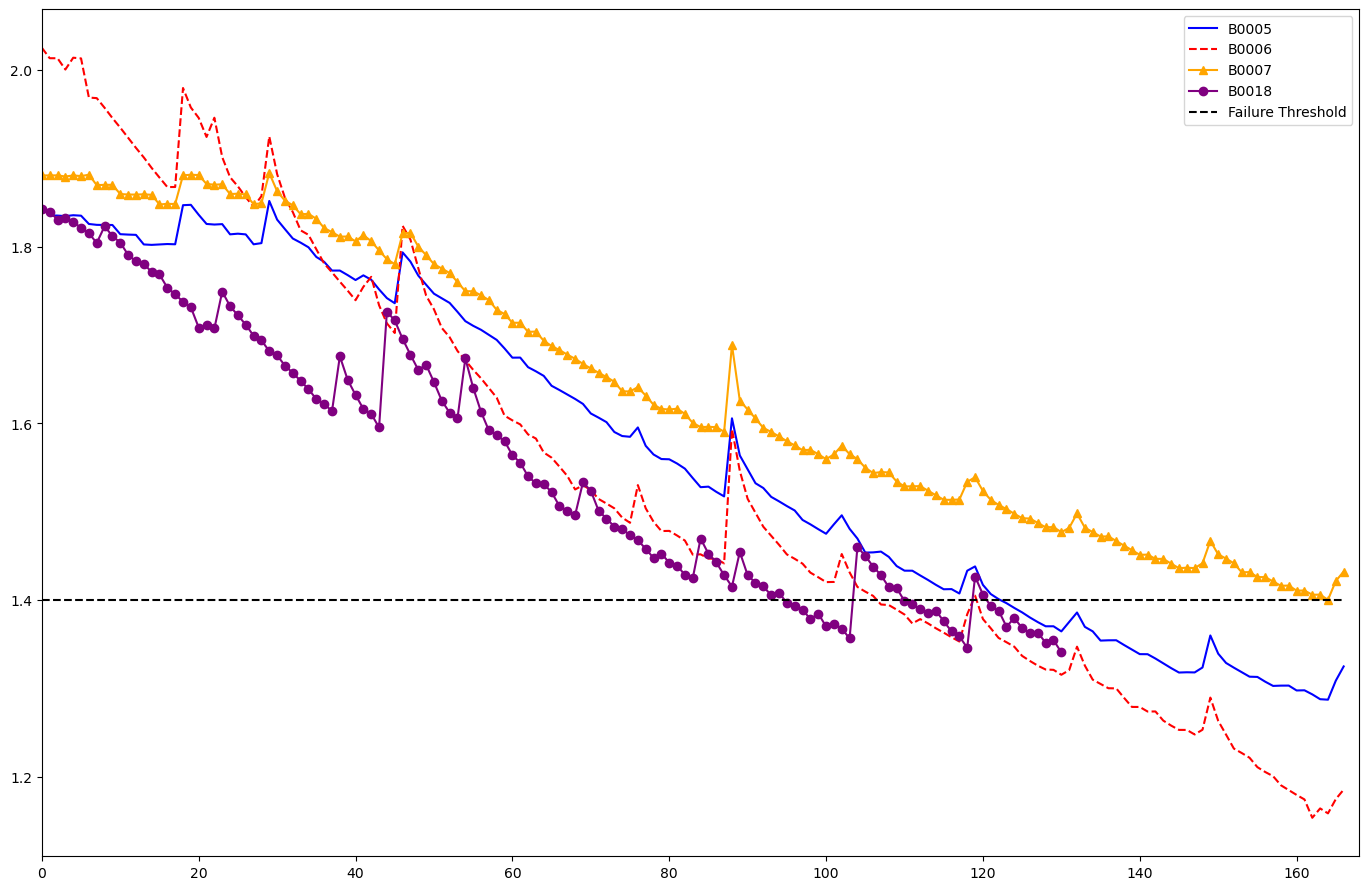

In [8]:
plt.rcParams['figure.figsize'] = [17, 11]
plt.xlim([0, 168])
plt.plot(b0005_capacity.index, b0005_capacity["capacity"], label="B0005", color='blue')
plt.plot(b0006_capacity.index, b0006_capacity["capacity"], label="B0006", color='red', linestyle='--')
plt.plot(b0007_capacity.index, b0007_capacity["capacity"], label="B0007", color='orange', marker = '^')
plt.plot(b0018_capacity.index, b0018_capacity["capacity"], label="B0018", color='purple', marker = 'o')
plt.plot(b0005_capacity.index, [1.4 for i in range(len(b0005_capacity.index))], label="Failure Threshold", color='black', linestyle = '--')
plt.legend()
plt.show()

### Plotly로 확인 (마우스 호버로 정확한 지점 확인 가능)

In [14]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(template='plotly_white')

fig.add_trace(go.Scatter(x=b0005_capacity.index, y=b0005_capacity["capacity"], mode='lines',name='B0005', line_dash='dot', line_width=5))
fig.add_trace(go.Scatter(x=b0006_capacity.index, y=b0006_capacity["capacity"], mode='lines+markers',name='B0006', marker_symbol='star', line_width=2))
fig.add_trace(go.Scatter(x=b0007_capacity.index, y=b0007_capacity["capacity"], mode='lines+markers',name='B0007', marker_symbol='arrow-right', line_width=2))
fig.add_trace(go.Scatter(x=b0018_capacity.index, y=b0018_capacity["capacity"], mode='lines+markers',name='B0018', line_width=2))
fig.add_trace(go.Scatter(x=b0005_capacity.index, y=[1.4 for i in range(len(b0005_capacity.index))], mode='lines',name='Threshold', line_color='black', line_width=2))

fig.update_layout(width=1100,height=800)
fig.update_xaxes(range=[0, 166])
fig.update_yaxes(range=[1.1, 2.1])

fig.update_xaxes(title_text='Cycle')
fig.update_yaxes(title_text='Capacity')

fig.update_layout(
    legend_yanchor="top",
    legend_xanchor="right",
    legend_font_size=23
)

fig.update_xaxes(title_font_size =30,
                title_font_color='black',
                title_font_family='Courier')
fig.update_yaxes(title_font_size =30,
                title_font_color='black',
                title_font_family='Courier')

fig.show()